# 1. g-h滤波器

In [1]:
%matplotlib inline

In [2]:
#format the book
import book_format
book_format.set_style()

## 通过以下的实验建立直觉
想象一下，我们生活在一个没有天平的世界里--天平就是你用来称体重的装置。一天上班时，一位同事跑过来向你宣布她发明了一种 "秤"。在她的解释下，你迫不及待地站了上去，并宣布了结果： "172磅"。你欣喜若狂--这是你有生以来第一次知道自己的体重。更重要的是，当你想象着把这个设备卖给全世界的减肥诊所时，你的眼中闪烁着美元的光芒！这真是太棒了！

另一位同事听到了动静，走过来想知道是什么让你如此兴奋。你解释了这项发明，并再次踏上体重秤，自豪地宣布结果： "161磅" 然后你犹豫了一下，有些困惑。

"几秒钟前显示的是 172 磅"，你向同事抱怨道。

"她回答说："我从没说过它是准确的。

传感器是不准确的。这就是大量过滤器工作背后的动机，而解决这个问题正是本书的主题。我可以只提供过去半个世纪以来开发出的解决方案，但这些解决方案是通过对我们所知道的事情和我们如何知道这些事情的本质提出非常基本、根本性的问题而开发出来的。在我们尝试计算之前，让我们跟随探索之旅，看看它是否启发了我们对过滤器的直觉。

## 尝试其他的传感器
我们有什么办法可以改善这个结果吗？ 显然，首先要尝试的是获得更好的传感器。 不幸的是，您的同事告诉您，她已经制作了 10 个秤，并且它们的运行精度都大致相同。 你让她拿出另一台秤，你在一个秤上称重，然后在另一个秤上称重。 第一个秤 (A) 读数为“160 磅”，第二个秤 (B) 读数为“170 磅”。 关于您的体重我们可以得出什么结论？

那么，我们的选择是什么？

我们可以选择只相信 A，并将 160 磅做为我的体重。
我们可以选择只相信 B，并将 170 磅做为我的体重。
我们可以选择一个小于 A 和 B 的数字。
我们可以选择一个比 A 和 B 都大的数字。
我们可以在 A 和 B 之间选择一个数字。
前两种选择似乎是合理的，但我们没有理由偏爱其中一种。 为什么我们会选择相信A而不是B？ 我们没有理由有这样的信念。 第三和第四个选择是不合理的。 诚然，这些量表不是很准确，但完全没有理由选择它们测量范围之外的数字。 最终的选择是唯一合理的。 如果两种体重秤都不准确，并且给出的结果可能高于我的实际体重，也可能低于我的实际体重，那么答案往往介于 A 和 B 之间。

在数学中，这个概念被形式化为期望值，稍后我们将深入讨论它。 现在问问自己，如果我们读取一百万个读数，“通常”会发生什么。 有时两个秤的读数都太低，有时两个秤的读数都太高，而其余时间它们会跨越实际重量。 如果它们跨越了实际重量，那么我们当然应该在 A 和 B 之间选择一个数字。如果它们没有跨越，那么我们不知道它们是否太高或太低，但是通过在 A 和 B 之间选择一个数字，我们可以 最小程度地减轻最差测量的影响。 例如，假设我们的实际体重是 180 磅。 160磅是一个很大的错误。 但如果我们选择 160 磅到 170 磅之间的重量，我们的估计将优于 160 磅。 如果两个秤返回的值都大于实际重量，则同样的论点成立。

我们稍后会更正式地处理这个问题，但现在我希望清楚的是我们的最佳估计是 A 和 B 的平均值。

$$\frac{160+170}{2} = 165$$
 
我们可以用图形的方式来看待这个问题。 我绘制了 A 和 B 的测量值，假设误差为 ±8 磅。 测量值介于 160 到 170 磅之间，因此唯一有意义的重量必须在 160 到 170 磅之间。

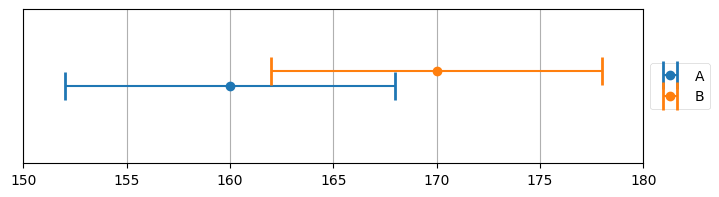

In [3]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

因此，165 磅看起来是一个合理的估计，但这里还有更多信息可供我们利用。 唯一可能的重量位于 A 和 B 的误差条之间的交点。例如，161 磅的重量是不可能的，因为秤 B 无法给出 170 磅的读数，最大误差为 8 磅。 同样，169 磅的重量也是不可能的，因为秤 A 无法给出 160 磅的读数，最大误差为 8 磅。 在此示例中，唯一可能的重量在 162 到 168 磅的范围内。

这还不允许我们找到更好的重量估计，但让我们再玩一下“假设”游戏。 如果我们现在得知 A 的准确率是 B 的三倍怎么办？ 考虑我们上面列出的 5 个选项。 选择 A 和 B 范围之外的数字仍然没有意义，因此我们不会考虑这些。 选择 A 作为我们的估计似乎更有说服力 - 毕竟，我们知道它更准确，为什么不使用它而不是 B？ B 单独能比 A 提高我们的知识吗？

答案或许与直觉相反，是的，可以。 首先，我们看一下 A=160 和 B=170 的相同测量值，但误差为 A ±
   3 磅，B 的误差为 3 倍，±
   9 磅。

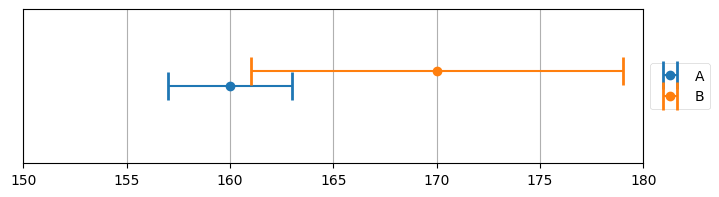

In [4]:
plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))

A 和 B 的误差线重叠是唯一可能的真实重量。 这种重叠小于 A 中单独的误差。 更重要的是，在本例中我们可以看到重叠不包括 160 磅或 165 磅。 如果我们只使用 A 的测量值，因为它比 B 更准确，我们会给出 160 磅的估计值。 如果我们平均 A 和 B，我们会得到 165 磅。 鉴于我们对秤精度的了解，这两种重量都是不可能的。 通过包括 B 的测量值，我们将给出介于 161 磅和 163 磅之间的估计值，即两个误差线交点的限制。

让我们把这个发挥到极限。 假设我们知道秤 A 的精确度为 1 磅。换句话说，如果我们真正的重量为 170 磅，它可能会报告 169、170 或 171 磅。 我们还知道 B 秤的精确度为 9 磅。 我们对每个秤进行称重，得到 A=160，B=170。 我们应该估计自己的体重是多少？ 让我们以图形方式来看一下。

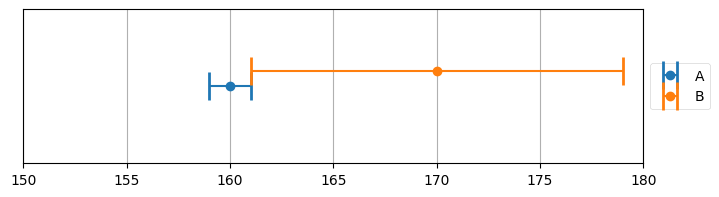

In [5]:
plot_errorbars([(160, 1, 'A'), (170, 9, 'B')], xlims=(150, 180))

在这里我们可以看到唯一可能的重量是 161 磅。 这是一个重要的结果。 通过两个相对不准确的传感器，我们能够推断出极其准确的结果。

因此，两个传感器即使其中一个不如另一个准确，也比一个更好。 我将在本书的其余部分反复讨论这一点。 我们永远不会丢弃信息，无论它有多糟糕。 我们将开发数学和算法，使我们能够包含所有可能的信息来源，以形成可能的最佳估计。

然而，我们已经偏离了我们的问题。 没有客户会想要购买多个秤，此外，我们最初假设所有秤都同样（不）准确。 无论准确性如何，使用所有测量值的这种见解将在以后发挥重要作用，所以不要忘记它。

如果我只有一台秤，但我多次称量自己的体重怎么办？ 我们得出的结论是，如果我们有两个精度相同的秤，我们应该对它们的测量结果进行平均。 如果我用一台秤称重 10,000 次会怎样？ 我们已经说过，比例尺返回太大数字的可能性与返回太小数字的可能性相同。 证明大量权重的平均值会非常接近实际重量并不难，但我们现在先写一个模拟。 我将使用 NumPy（SciPy 生态系统的一部分）进行数值计算。

In [6]:
import numpy as np
measurements = np.random.uniform(160, 170, size=10000)
mean = measurements.mean()
print(f'Average of measurements is {mean:.4f}')

Average of measurements is 165.0167


打印的确切数字取决于您的随机数生成器，但它应该非常接近 165。

此代码做出了一个可能不正确的假设 - 对于 165 磅的真实重量，秤读数为 160 的可能性与 165 的可能性相同。 这几乎从来都不是真的。 真实传感器更有可能获得更接近真实值的读数，并且越来越不可能获得远离真实值的读数。 我们将在高斯章节中详细介绍这一点。 现在，我将使用 numpy.random.normal() 函数，无需进一步解释，该函数将产生更多接近 165 磅的值，而更远的值则更少。 现在请相信，这将产生与真实秤的工作原理类似的嘈杂测量结果。

In [7]:
mean = np.random.normal(165, 5, size=10000).mean()
print(f'Average of measurements is {mean:.4f}')

Average of measurements is 165.0147


答案再次非常接近 165。

好吧，太好了，我们的传感器问题有了答案！ 但这不是一个非常实际的答案。 没有人有耐心称自己一万次，甚至十几次。

那么，让我们来玩“假设”吧。 如果您每天测量一次体重，读数分别为 170、161，然后是 169，结果会怎样。您的体重是增加了、减轻了，还是这一切都只是噪音测量？

我们实在说不准。 第一次测量为 170，最后一次测量为 169，意味着减重 1 磅。 但如果秤仅精确到 10 磅，则可以用噪音来解释。 我实际上本来可以增重； 也许我第一天的体重是 165 磅，第三天是 172 磅。随着体重的增加，可以获得这些体重读数。 我的体重秤告诉我我正在减肥，而我实际上正在增加体重！ 让我们用图表来看看。 我绘制了测量值和误差线，然后绘制了一些可能的体重增加/减少，可以通过绿色虚线中的测量值来解释。

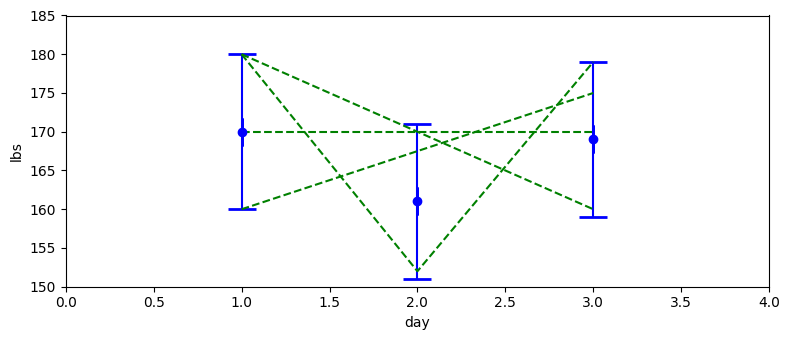

In [8]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

正如我们所看到的，这三个测量值可以解释体重变化的极端范围。 事实上，有无数种选择。 我们要放弃吗？ 不是我！ 回想一下，我们正在谈论测量人类的体重。 对于一个人来说，第一天体重为 180 磅，第三天体重为 160 磅，或者在一天内减掉 30 磅，第二天又恢复回来（我们假设没有截肢或其他创伤），这是不合理的。

我们正在测量的物理系统的行为应该影响我们如何解释测量结果。 如果我们每天称量一块岩石，我们会将所有差异归因于噪音。 如果我们对一个由雨水供给并用于做家务的蓄水池进行称重，我们可能会相信这种重量变化是真实的。

假设我采用不同的比例，得到以下测量值：169、170、169、171、170、171、169、170、169、170。您的直觉告诉您什么？ 例如，您可能每天增加 1 磅，而噪声测量值恰好看起来您的体重保持不变。 同样，您可以每天减重 1 磅，但获得相同的读数。 但这有可能吗？ 抛一枚硬币连续出现 10 次正面的可能性有多大？ 不太可能。 我们不能仅根据这些读数来证明这一点，但我的体重很可能保持稳定。 在下面的图表中，我用误差线绘制了测量结果，并用绿色虚线绘制了可能的真实重量。 这条虚线并不意味着是这个问题的“正确”答案，而只是一个合理的答案，并且可以通过测量来解释。

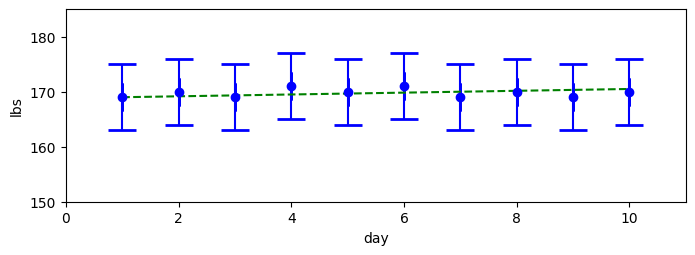

In [9]:
gh.plot_hypothesis2()

另一个假设：如果读数为 158.0、164.2、160.3、159.9、162.1、164.6、169.6、167.4、166.4、171.0 会怎样？ 让我们看一下图表，然后回答一些问题。

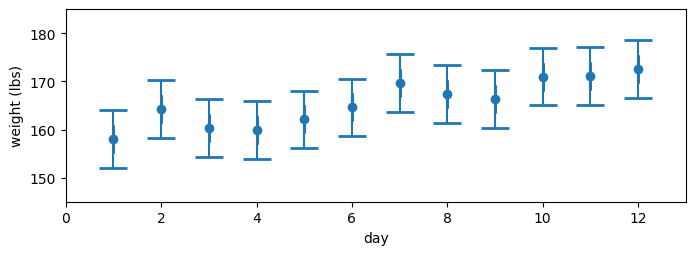

In [10]:
gh.plot_hypothesis3()

我“看起来”体重减轻了吗，而这只是真正的噪音数据吗？ 并不是。 我看起来有可能保持同样的体重吗？ 再说一次，不。 该数据随着时间的推移呈上升趋势； 不是均匀的，但肯定是向上的。 我们不能确定，但这看起来像是体重增加，而且是显着的体重增加。 让我们用更多的图来测试这个假设。 与表格相比，“观察”图表中的数据通常更容易。

那么让我们看看两个假设。 首先，我们假设我们的体重没有改变。 为了得到这个数字，我们同意应该对测量结果进行平均。 我们来看看。

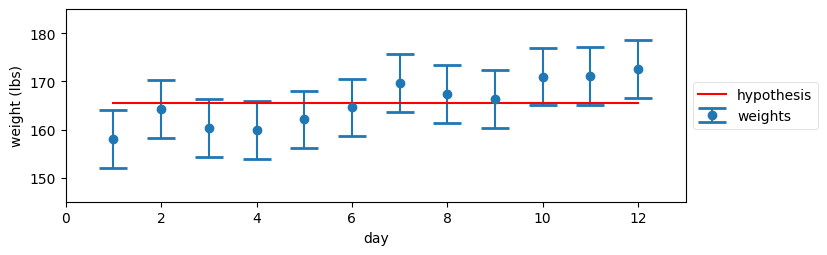

In [11]:
gh.plot_hypothesis4()

这看起来不太有说服力。 事实上，我们可以看到在所有误差线内部都没有可以绘制的水平线。

现在，假设我们体重增加了多少？ 我不知道，但 NumPy 知道！ 我们想通过测量结果画一条看起来“大约”正确的线。 NumPy 具有根据称为“最小二乘拟合”的规则执行此操作的函数。 我们不用担心计算的细节（如果您感兴趣，我使用 polyfit()），只需绘制结果即可。

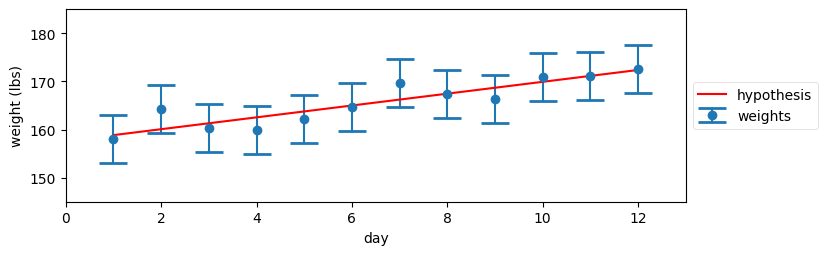

In [12]:
gh.plot_hypothesis5()

这看起来好多了，至少在我看来是这样。 请注意，现在假设与每个测量值非常接近，而在上一张图中，假设通常与测量值相距甚远。 我体重增加的可能性似乎比没有增加的可能性大得多。 我真的增加了 13 磅吗？ 谁能说一下？ 这似乎无法回答。

“但这不可能吗？” 给同事打电话。

让我们尝试一些疯狂的事情。 假设我知道我每天会增加大约一磅。 不管我现在如何知道这一点，假设我知道它大致正确。 也许我每天的饮食摄入量为 6000 卡路里，这会导致体重增加。 或者也许还有另一种方法来估计体重增加。 这是一个思想实验，细节并不重要。 让我们看看是否可以利用这些信息（如果有的话）。

第一个测量值是 158。我们无法知道任何不同，所以让我们接受它作为我们的估计。 如果我们今天的体重是158，明天会是多少？ 好吧，我们认为我们的体重正在以 1 磅/天的速度增加，所以我们的预测是 159，如下所示：

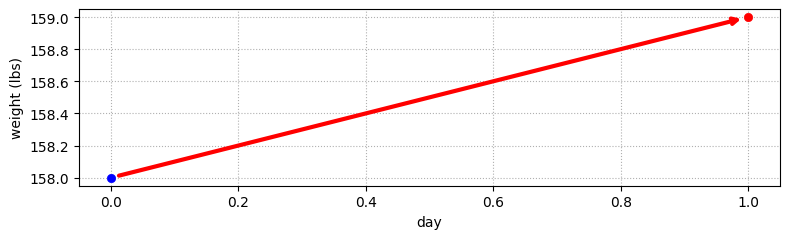

In [13]:
gh.plot_estimate_chart_1()

好吧，但是这有什么好处呢？ 当然，我们可以假设 1 磅/天是准确的，并预测接下来 10 天的体重，但如果我们不合并其读数，为什么还要使用体重秤呢？ 那么让我们看看下一个测量。 我们再次站在秤上，它显示 164.2 磅。

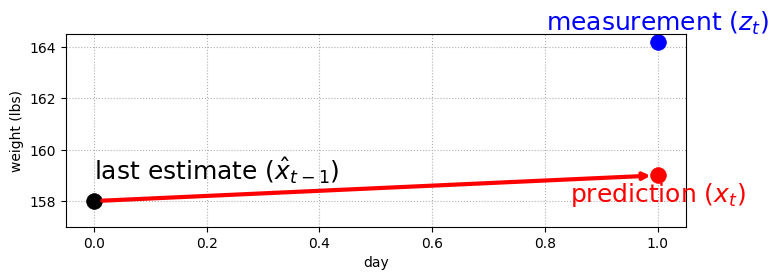

In [14]:
gh.plot_estimate_chart_2()

我们出现了问题。 我们的预测与我们的测量不符。 但是，这正是我们所期望的，对吧？ 如果预测始终与测量完全相同，则它将无法向过滤器添加任何信息。 当然，由于我们的预测是完美的，因此没有理由进行测量。

> 整本书的关键见解在下一段。 仔细阅读！

那么我们该怎么办？ 如果我们仅根据测量形成估计，那么预测将不会影响结果。 如果我们仅根据预测形成估计，那么测量将被忽略。 如果要实现这一点，我们需要将预测和测量结合起来（我已将关键点加粗）。

混合两个值 - 这听起来很像之前的两个尺度问题。 使用与之前相同的推理，我们可以看到唯一有意义的是在预测和测量之间选择一个数字。 例如，估计值 165 没有意义，157 也没有意义。我们的估计值应介于 159（预测）和 164.2（测量）之间。

再说一次，这一点非常重要。 我们一致认为，当给出两个有误差的值时，我们应该在这两个值之间形成一个估计值。 这些值是如何生成的并不重要。 在本章开头，我们有两个测量，但现在我们有一个测量和一个预测。 两种情况下的推理和数学都是相同的。 我们从不丢弃信息。 我是认真的。 我看到很多商业软件都会丢弃噪音数据。 不要这样做！ 我们对体重增加的预测可能不是很准确，但只要有一些信息，我们就应该使用它。

我必须坚持让你停下来认真考虑一下这个问题。 我所做的只是用基于人体生理学的不准确体重预测来取代不准确的体重秤。 它仍然是数据。 数学不知道数据是来自比例还是预测。 我们有两条带有一定噪声的数据，我们想要将它们组合起来。 在本书的其余部分中，我们将开发一些相当复杂的数学来执行此计算，但数学从不关心数据来自哪里，它只根据这些值的值和准确性进行计算。

估计值应该介于测量值和预测值之间吗？ 也许吧，但总的来说，我们似乎知道与测量相比，我们的预测或多或少准确。 我们预测的准确性可能与测量值的准确性不同。 回想一下当 A 比 B 准确得多时我们所做的事情 - 我们将答案调整为更接近 A 而不是 B。让我们在图表中看一下。

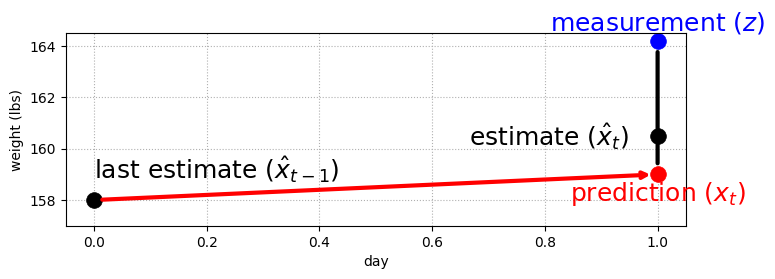

In [15]:
gh.plot_estimate_chart_3()

现在让我们尝试随机选择一个数字来衡量我们的估计：$\frac{4}{10}$.我们的估计将是测量值的十分之四，其余部分将来自预测。 换句话说，我们在这里表达了一种信念，即预测比测量更有可能正确的信念。 我们将其计算为

$$\mathtt{estimate} = \mathtt{prediction} + \frac{4}{10}(\mathtt{measurement} - \mathtt{prediction})$$
 
测量值和预测值之间的差异称为残差，由上图中的黑色垂直线表示。 这将成为稍后使用的重要值，因为它是测量值与滤波器输出之间差异的精确计算。 残差越小意味着性能越好。

让我们对其进行编程，并在针对上面的一系列权重进行测试并查看结果。 我们必须考虑另一个因素。 体重增加的单位是磅/时间，所以一般来说我们需要添加一个时间步长𝑡，我们将其设置为 1（天）。

我手工生成了体重数据，对应于 160 磅的真实起始体重和每天 1 磅的体重增加。 换句话说，第一天（第 0 天）的真实重量是 160 磅，第二天（第一天，称重的第一天）真实重量是 161 磅，依此类推。

我们需要猜测初始重量。 现在谈论初始化策略还为时过早，所以现在我假设 160 磅。

In [16]:
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    # 先预测
    for z in weights: 
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter 
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)  

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


[158.0,
 164.2,
 160.3,
 159.9,
 162.1,
 164.6,
 169.6,
 167.4,
 166.4,
 171.0,
 171.2,
 172.6]

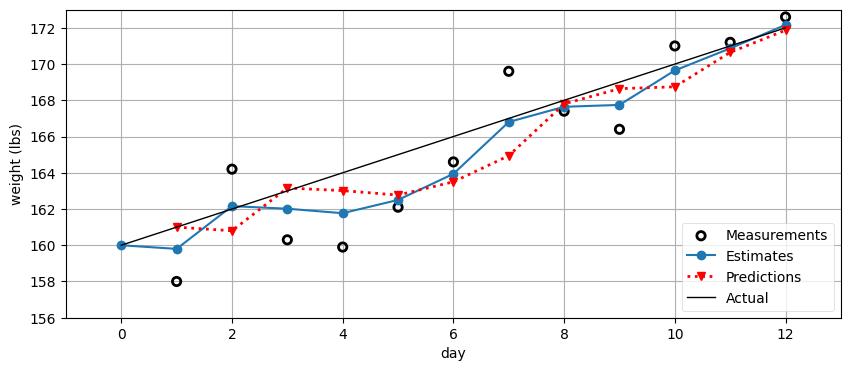

In [17]:
# plot results
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 172])
weights

相当不错了！ 这里的数据很多，我们来说说如何解读。 蓝色粗线显示过滤器的估计值。 从第 0 天开始，最初猜测重量为 160 磅。 红线显示根据前一天的体重做出的预测。 因此，第一天之前的体重为 160 磅，体重增加为 1 磅，因此第一个预测为 161 磅。 第一天的估计值介于预测值和测量值之间，为 159.8 磅。 图表下方打印了之前的体重、预测体重和每天的新估计体重。 最后，细黑线显示被称重者的实际体重增加。

每天完成此操作，确保您了解每个步骤的预测和估计是如何形成的。 请注意估计值总是落在测量值和预测值之间。

估计值不是直线，但它们比测量值更直，并且有点接近我们创建的趋势线。 而且，随着时间的推移，情况似乎会变得更好。

过滤器的结果也可能会让您觉得很愚蠢； 当然，如果我们假设我们的体重增加约为 1 磅/天，那么数据看起来会很好！ 让我们看看如果我们对于增长率最初的猜测是错误的，过滤器会做什么。 我们假设每天减重 1 磅：

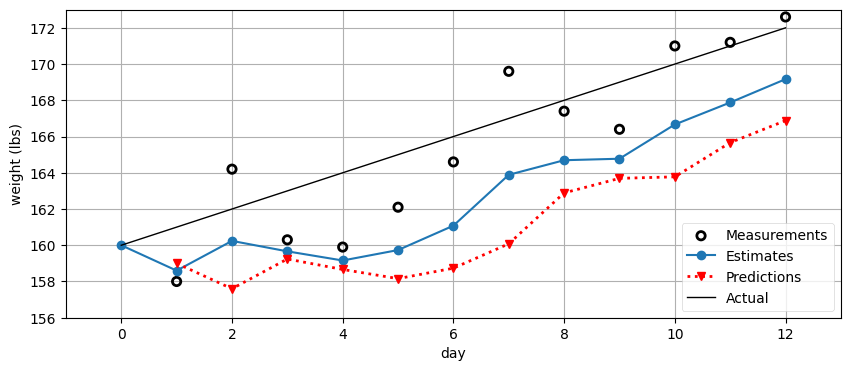

In [18]:
e, p = predict_using_gain_guess(initial_estimate, -1.)
gh.plot_gh_results(weights, e, p, [160, 172])

这并不那么令人印象深刻。 估计很快就会偏离测量结果。 显然，要求我们正确猜测变化率的过滤器并不是很有用。 即使我们最初的猜测是正确的，一旦变化率发生变化，过滤器就会失败。 如果我停止暴饮暴食，过滤器将很难适应这种变化。 注意，它正在调整！ 尽管我们告诉它我们每天减重 1 磅，但估计值仍在攀升。 它只是调整得不够快。

但是，‘如果’呢？ 如果我们不将体重增加保留在 1 磅（或其他）的初始猜测值，而是根据现有的测量和估计来计算，结果会怎样呢？ 第一天我们对重量的估计是：

$$
(160 + 1) + \frac{4}{10}(158-161) = 159.8
$$
 
第二天，我们测量到 164.2，这意味着体重增加了 4.4 磅（因为 164.2 - 159.8 = 4.4），而不是 1。我们可以以某种方式使用此信息吗？ 这似乎是有道理的。 毕竟，体重测量本身是基于我们体重的真实测量，因此存在有用的信息。 我们对体重增加的估计可能并不完美，但它肯定比仅仅猜测我们的体重增加了 1 磅要好。数据比猜测更好，即使它有噪音。

人们在这一点上真的很犹豫，所以请确保你同意。 两次有噪声的体重测量结果为我们提供了隐含的体重增加/减少。 如果测量不准确，则该估计将非常不准确，但此计算中仍然包含信息。 想象一下，用精确到 1 磅的秤给一头牛称重，结果显示这头牛增加了 10 磅。 根据误差的不同，奶牛的体重可能会增加 8 磅到 12 磅，但我们知道它的体重增加了，以及大概增加了多少。 这是信息。 我们用信息做什么？ 永远不要扔掉它！

回到我的饮食。 我们应该将新的每天增重设置为 4.4 磅吗？ 昨天我们认为体重增加了 1 磅，今天我们认为是 4.4 磅。 我们有两个数字，想以某种方式将它们组合起来。 嗯，听起来又像我们同样的问题。 让我们使用相同的工具，也是我们迄今为止唯一的工具 - 在两者之间选择一个值。 这次我将使用另一个任意选择的数字，1/3
  。 该方程与重量估计相同，只是我们必须考虑时间，因为这是一个比率（增益/天）：
  
  $$\text{new gain} = \text{old gain} + \frac{1}{3}\frac{\text{measurement - predicted weight}}{1 \text{ day}}
$$

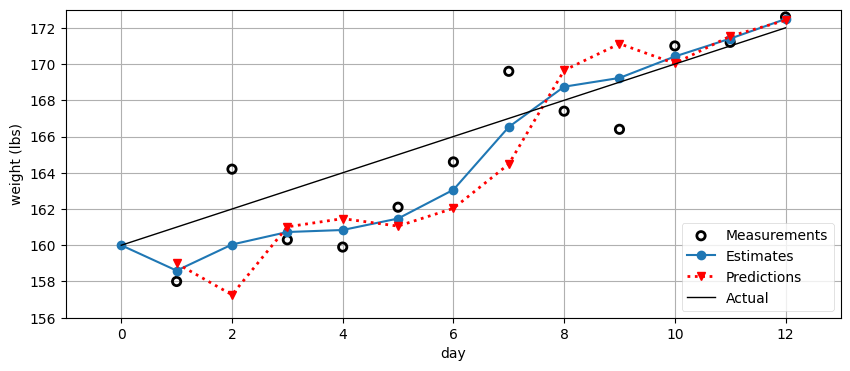

In [26]:
weight = 160.  # initial guess
gain_rate = -1.0  # initial guess

time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    # prediction step
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale   * (residual/time_step)
    weight    = weight    + weight_scale * residual
  
    estimates.append(weight)

gh.plot_gh_results(weights, estimates, predictions, [160, 172])

我认为这看起来非常好。 由于最初对体重增加的猜测较差，为 -1，过滤器需要几天时间才能准确预测体重，但一旦做到这一点，它就开始准确跟踪体重。 我们没有使用任何方法来选择比例因子 4/10 和 1/3（实际上，对于这个问题来说，它们是糟糕的选择），但除此之外，所有的数学都遵循非常合理的假设。 回想一下，如果您想查看逐步绘制的图，可以将参数time_step 的值更改为更大的值并重新运行单元格。

在我们继续之前还有最后一点。 在预测步骤中我写了这一行

```python
gain_rate = gain_rate
``` 

这显然没有任何影响，可以删除。 我写这篇文章是为了强调，在预测步骤中，您需要预测所有变量 `weight` 和 `gain_rate` 的下一个值。 这很快就会变得有意义。 在这种情况下，我们假设增益不变，但当我们推广该算法时，我们将删除该假设。

# g-h 滤波器

这种算法叫做g-h滤波器或者叫做$\alpha$-$\beta$ 滤波器，$g$ 和 $h$ 指的是我们在示例中使用的两个缩放因子。 $g$ 是我们用于测量的缩放比例（在我们的示例中为重量），$h$ 是测量值随时间变化的缩放比例（在我们的示例中为磅/天）。$\alpha$ 和 $\beta$ 只是用于此因子的不同名称。

该滤波器是大量滤波器的基础，包括卡尔曼滤波器。 换句话说，卡尔曼滤波器是 g-h 滤波器的一种形式，我将在本书后面证明这一点。 您可能听说过的最小二乘滤波器也是如此，您可能还没有听说过的 Benedict-Bordner 滤波器也是如此。 每个过滤器都有不同的方式为 $g$ 和 $h$ 赋值，但其他方面的算法是相同的。 例如，Benedict-Bordner 过滤器为 $g$ 和 $h$ 分配一个常量，并将其限制在特定的值范围内。 其他滤波器（例如卡尔曼）将在每个时间步动态改变 $g$ 和 $h$。

**让我重复一下要点，因为它们非常重要**。 如果你不理解这些，你就无法理解本书的其余部分。 如果您确实理解了它们，那么本书的其余部分将自然地为您展开，作为我们将询问的有关 $g$ 和 $h$ 的各种“假设”问题的数学阐述。 数学看起来可能截然不同，但算法将完全相同。

* 多个数据点比一个数据点更准确，因此无论多么不准确，都不要丢弃任何数据。
* 始终选择两个数据点之间的数字部分以创建更准确的估计。
* 根据当前估计以及我们认为会发生变化的程度来预测下一次测量和变化率。
* 然后选择新的估计作为预测和下一次测量之间的一部分，并根据每个测量的准确程度进行缩放。

让我们看一下该算法的直观描述。

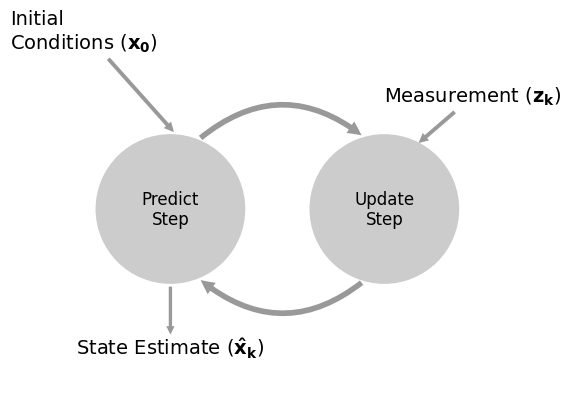

In [27]:
book_plots.predict_update_chart()

让我介绍一些更正式的术语。 系统就是我们要估计的对象。 在本章中，系统就是我们试图权衡的任何东西。 有些文献称其为Plant。 该术语来自控制系统理论。

系统的状态是我们感兴趣的系统的当前配置或值。 我们只对重量读数感兴趣。 如果我把100公斤的重量放在秤上，状态就是100公斤。 我们根据与我们相关的内容来定义状态。 刻度的颜色与我们无关，因此我们不会将这些值包含在状态中。

测量值是系统的测量值。 测量可能不准确，因此它的值可能与状态值不同。

状态估计是我们的过滤器对状态的估计。 例如，对于 100 公斤的重量，由于传感器误差，我们的估计值可能为 99.327 公斤。 这通常缩写为“估计”，我在本章中已经这样做了。

换句话说，状态应该被理解为系统的实际值。 这个值通常对我们来说是隐藏的。 如果我站在秤上，你就会进行测量。 我们称其为可观察的，因为您可以直接观察该测量。 相比之下，你永远无法直接观察我的体重，你只能测量它。

这种“隐藏”和“可观察”的概念很重要。 任何估计问题都包括通过可观察的测量形成隐藏状态的估计。 如果您阅读文献，那么在定义问题时会使用这些术语，因此您需要熟悉它们。

我们使用过程模型对系统进行数学建模。 在本章中，我们的过程模型假设我今天的体重是昨天的体重加上我后一天的体重增加。 过程模型不对传感器进行建模或以其他方式说明。 另一个例子是汽车的流程模型。 过程模型可能是“距离等于速度乘以时间。这个模型并不完美，因为汽车的速度可能会在非零的时间内变化，轮胎可能会在道路上打滑，等等。系统误差或 过程误差是这个模型中的误差。我们永远不会确切地知道这个值；如果我们知道的话，我们可以改进我们的模型以使其误差为零。有些文本使用工厂模型和工厂误差。您也可能会看到系统模型。它们的含义都相同 事物。

预测步骤称为系统传播。 它使用过程模型来形成新的状态估计。 由于过程误差，这个估计是不完美的。 假设我们随着时间的推移跟踪数据，我们说我们将状态传播到未来。 有些文本称之为进化。

更新步骤称为测量更新。 系统传播和测量更新构成一次迭代。

现在让我们探索几个不同的问题领域，以更好地理解该算法。 考虑尝试在轨道上跟踪火车的问题。 轨道将火车的位置限制在一个非常特定的区域。 此外，火车又大又慢。 他们需要很多分钟才能显着减速或加速。 因此，如果我知道火车在时间 t 处的公里标记为 23 公里，并以 18 公里/小时的速度行驶，我就可以非常有信心地预测它在时间 t + 1 秒的位置。 为什么这很重要？ 假设我们只能测量其位置，精度为 ±250米。 火车以 18 公里/小时（即每秒 5 米）的速度行驶。 在 t+1 秒时，火车将达到 23.005 公里，但测量值可能在 22.755 公里到 23.255 公里之间的任何位置。 因此，如果下一次测量显示位置为 23.4，我们就知道这一定是不准确的。 即使在时间 t 工程师猛踩刹车，火车仍将非常接近 23.005 公里，因为火车不可能在 1 秒内减速太多。 如果我们要为这个问题设计一个过滤器（我们将在本章中进一步介绍！），我们会希望设计一个与测量相比给予预测非常高的权重的过滤器。

现在考虑跟踪抛出的球的问题。 我们知道，弹道物体在真空中处于引力场时会沿抛物线运动。 但扔到地球上的球会受到空气阻力的影响，因此它不会以完美的抛物线运动。 棒球投手在投掷曲线球时会利用这一事实。 假设我们正在使用计算机视觉跟踪体育场内的球，这是我在工作中所做的事情。 计算机视觉跟踪的准确性可能不太高，即通过假设球沿抛物线移动来预测球的未来位置也不是非常准确。 在这种情况下，我们可能会设计一个过滤器，为测量和预测赋予大致相同的权重。

现在考虑尝试在飓风中追踪氦气球。 我们没有合法的模型可以让我们预测气球的行为，除非在非常短的时间范围内（例如，我们知道气球不能在 1 秒内飞行 10 英里）。 在这种情况下，我们将设计一个过滤器，强调测量而不是预测。

本书的大部分内容致力于以数学方式表达最后三段中的问题，从而使我们能够找到最佳解决方案（在某种数学意义上）。 在本章中，我们只是以更直观的方式为 $g$ 和 $h$ 分配不同的值，因此不太理想。 但基本思想是将有些不准确的测量与有些不准确的系统行为模型相结合，以获得比任何一个信息源本身更好的过滤估计。

我们可以这样表达算法：

**初始化**

     1.初始化过滤器的状态
     2.初始化我们对状态的信任
     
**预测**

     1.利用系统行为来预测下一个时间步的状态
     2.调整信任以考虑预测的不确定性
     
**更新**

     1. 获得测量值以及对其准确性的信任
     2. 计算估计状态和测量之间的残差
     3. 新的估计位于残差线上的某个位置

我们将在整本书中使用相同的算法，尽管有一些修改。

# 注释

我将开始介绍文献中使用的符号和变量名称。 其中一些已在上面的小节中使用。 测量通常表示为 $z$，这就是我们将在本书中使用的内容（一些文献使用 $y$）。 下标$k$表示时间步，所以$z_k$就是这个时间步的数据。 粗体字体表示向量或矩阵。 到目前为止，我们只考虑了拥有一个传感器，因此只有一个传感器测量，但一般来说，我们可能有 *n* 个传感器和 *n* 个测量。 $\mathbf{x}$ 表示我们的状态，并且粗体表示它是一个向量。 对于我们的秤示例，它代表初始体重和初始体重增加率，如下所示：

$$\mathbf{x} = \begin{bmatrix}x \\ \dot{x}\end{bmatrix}$$

在这里，我使用牛顿符号 x 上的一个点来表示速度。 更准确地说，点表示 x 对时间的导数，这当然是速度。 对于体重为 62 公斤且每天增重 0.3 公斤的情况，我们有

$$\mathbf{x} = \begin{bmatrix}62 \\ 0.3\end{bmatrix}$$

所以，算法很简单。 状态使用初始估计 $\mathbf{x_0}$ 进行初始化。 然后我们进入一个循环，根据时间（或步骤）$k-1$ 的值预测时间或步骤 $k$ 的状态。 然后我们得到测量值 $z_k$ 并在测量值和预测之间选择一些中间点，创建估计值 $\mathbf{x}_k$。

# 练习：通用算法编程

在上面的示例中，我明确地对此进行了编码，以解决我们在整章中讨论的称重问题。 例如，变量被命名为“weight_scale”、“gain”等。 我这样做是为了使算法易于遵循 - 您可以轻松地看到我们正确地实现了每个步骤。 但是，这是专门为一个问题编写的代码，然而算法对于任何问题都是相同的。 因此，让我们将代码重写为通用的——以解决任何问题。 使用此函数：

```python
def g_h_filter(data, x0, dx, g, h, dt):
    """
    Performs g-h filter on 1 state variable with a fixed g and h.

    'data' contains the data to be filtered.
    'x0' is the initial value for our state variable
    'dx' is the initial change rate for our state variable
    'g' is the g-h's g scale factor
    'h' is the g-h's h scale factor
    'dt' is the length of the time step 
    """
```
以 NumPy 数组而不是列表的形式返回数据。 通过传递与之前相同的重量数据来测试它，绘制结果，并直观地确定它是否有效。

In [28]:
from kf_book.gh_internal import plot_g_h_results
def g_h_filter(data, x0, dx, g, h, dt):
    pass #  your solution here

# uncomment to run the filter and plot the results
#book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
#data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
#plot_g_h_results(weights, data)

# 答案与讨论

[158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
[159.2   161.8   162.1   160.78  160.985 163.311 168.1   169.696
 168.204 169.164 170.892 172.629]


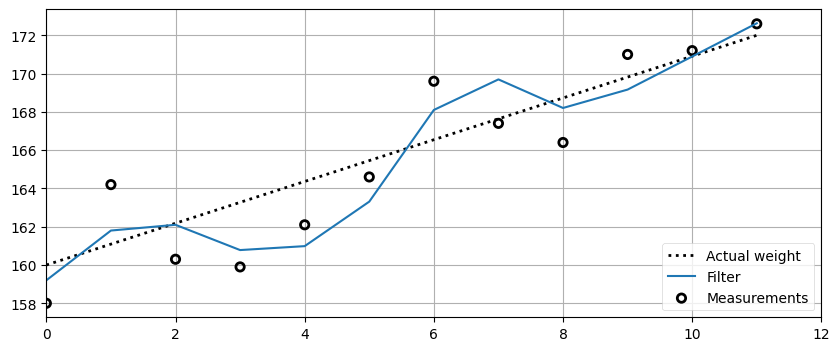

In [29]:
import matplotlib.pylab as pylab

def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)

book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
plot_g_h_results(weights, data)
print(weights)
print(data)

这是很简单的。我只是用变量名称`x0`、`dx`等替换了增重代码中的变量名称。没有其他需要改变的。

# $g$ 和 $h$ 的选择

g-h 过滤器不是一个过滤器 - 它是一系列过滤器的分类。 Eli Brookner 在《跟踪与卡尔曼滤波简易入门》中列出了 11 个，我相信还有更多。 不仅如此，每种类型的过滤器都有许多子类型。 每个过滤器通过 $g$ 和 $h$ 的选择方式来区分。 因此，我在这里无法提供“一刀切”的建议。 一些过滤器将 $g$ 和 $h$ 设置为常量，其他过滤器则动态地改变它们。 卡尔曼滤波器在每一步动态地改变它们。 某些过滤器允许 $g$ 和 $h$ 取一定范围内的任何值，其他过滤器则通过某个函数 $f(\dot{}), \mbox{即 }g = f(h)$限制一个值依赖于另一个值。

这本书并不全面讨论整个g-h滤波器家族，我们更感兴趣的是这些滤波器背后的贝叶斯思想，这一点我还没有深入探讨。所以在选择$g$和$h$的问题上，我不会过多展开。如果想深入了解这方面的内容，《跟踪与卡尔曼滤波简易入门》是个绝佳的资源。或许这个立场对你来说有点奇怪，但典型的卡尔曼滤波器并不使用$g$和$h$这些参数。事实上，卡尔曼滤波器在数学上可以归结为一个g-h滤波器算法。在设计卡尔曼滤波器时，我们采用的设计标准可以数学上简化为$g$和$h$，但通常用卡尔曼滤波器的形式来更有力地思考问题。如果现在还有些不太明白，没关系，在我们深入研究卡尔曼滤波理论后，这些概念会更加清晰的。

值得看一下改变$g$和$h$是如何影响结果的，所以我们会通过一些例子来进行探讨。这将为我们提供对这种类型滤波器的基本优势和局限性有深刻的洞察，并帮助我们理解更为复杂的卡尔曼滤波器的行为。



# 练习：创造测量方程

现在让我们编写一个函数来为我们生成噪声数据。在这本书中，我将一个带有噪声的信号建模为信号加上白噪声。我们还没有涵盖足够的统计知识来完全理解白噪声的定义。简单来说，可以将其看作是数据随机地在信号上下波动，没有规律可循。我们说它是一个序列上不相关的随机变量，均值为零且有有限的方差。如果你还不理解，到了高斯分布这一章节结束时你可能会更清楚。如果你对统计学没有了解，可能无法成功完成这个练习。如果是这样，可以直接阅读答案和讨论部分。

我们可以用 numpy.random.randn() 生成白噪声。我们需要一个函数，通过传入起始值、每步变化量、步数以及噪声水平作为参数调用。该函数会返回一个数据列表。我们可以用它生成30个数据点，然后通过 g_h_filter() 进行滤波，并用 plot_g_h_results() 绘制结果来测试。

# 答案

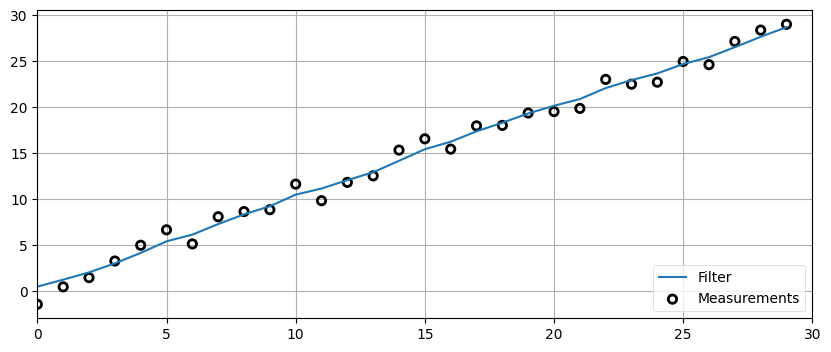

In [30]:
from numpy.random import randn
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurements = gen_data(0, 1, 30, 1)
data = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.02)
plot_g_h_results(measurements, data)

# 讨论

`randn()`函数返回以0为中心的随机数，正数和负数出现的概率一样。它的变化范围是*一个标准差*，如果你不清楚标准差是什么，没关系。我画了3000个`randn()`的调用结果，你可以看到这些值以0为中心，大多数在略低于-1到略高于+1之间，偶尔会有更大的值出现。

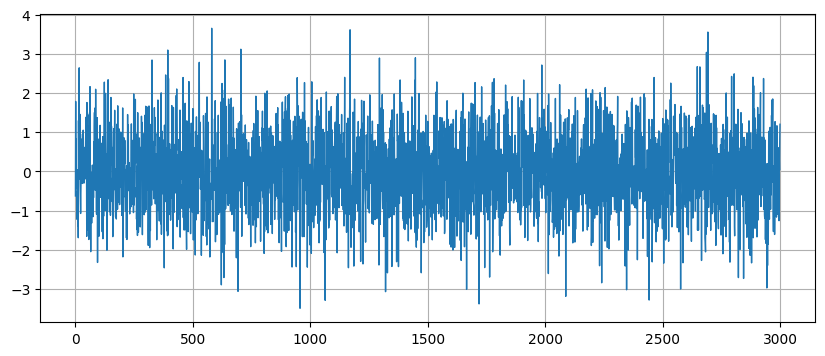

In [31]:
plt.plot([randn() for _ in range(3000)], lw=1);

# 练习：糟糕的初始条件

现在编写代码，使用`gen_data`和`g_h_filter`来过滤100个数据点。这些数据点起始于5，具有导数为2，噪声缩放因子为10，并且使用g=0.2和h=0.02。将初始的 x 猜测值设为100。

# 答案与讨论

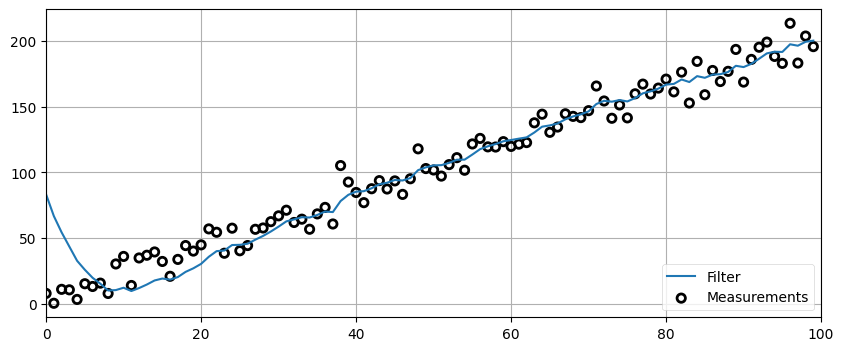

In [32]:
zs = gen_data(x0=5., dx=2., count=100, noise_factor=10)
data = g_h_filter(data=zs, x0=100., dx=2., dt=1., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)


由于初始猜测值为100，滤波器开始时估计与测量数据相差甚远。你可以看到它在最终稳定于测量数据之前出现了“回响”。‘回响’意味着信号以正弦类型的模式超过和低于数据。这是滤波器中非常常见的现象，许多滤波器设计的工作都致力于最小化回响。这是一个我们目前还没有准备好讨论的话题，但我想向你展示这种现象。

# 练习：极端噪声

重新运行相同的测试，但这次使用噪声因子为100。通过将初始条件从100改为5，消除初始条件的回响效应。

# 答案与讨论

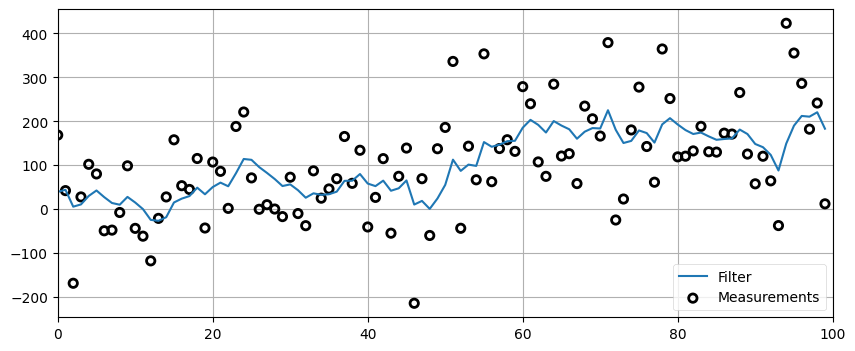

In [34]:
zs = gen_data(x0=5., dx=2., count=100, noise_factor=100)
data = g_h_filter(data=zs, x0=5., dx=2., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

这个结果看起来并不是很理想。我们可以看到，滤波后的信号可能变化比嘈杂信号小一些，但它远远不能构成一条直线。如果我们只绘制滤波后的结果，没有人会猜到信号是从5开始，每个时间步长增加2。虽然在某些地方滤波器似乎能够减少噪声，但在其他地方它似乎会出现过度和不足的情况。

目前我们了解的还不够多，很难做出真正的评判。我们添加了很多噪声，也许这就是滤波可以达到的最好效果。然而，后续章节的存在应该表明我们还有很大的提升空间。

# 练习：加速度的影响

编写一个新的数据生成函数，在计算每个数据点时添加一个恒定的加速度因子。换句话说，逐个数据点增加dx，使速度（dx）不断增加。将噪声设置为0，$g=0.2$，$h=0.02$，并使用`plot_g_h_results`或你自己的方法绘制结果。尝试不同的加速度和时间步长，解释你观察到的现象。

# 答案与讨论

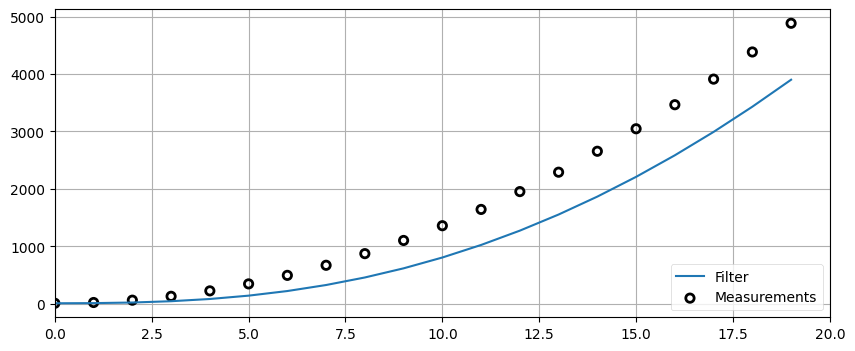

In [35]:
def gen_data(x0, dx, count, noise_factor, accel=0.):
    zs = []
    for i in range(count):
        zs.append(x0 + accel * (i**2) / 2 + dx*i + randn()*noise_factor)
        dx += accel
    return zs
   
predictions = []
zs = gen_data(x0=10., dx=0., count=20, noise_factor=0, accel=9.)
data = g_h_filter(data=zs, x0=10., dx=0., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

每个预测都落后于信号。如果你考虑正在发生的事情，这是有道理的。我们的模型假设速度是恒定的。g-h滤波器计算$x$的一阶导数（我们用$\dot{x}$表示导数），但不计算二阶导数$\ddot{x}$。因此，我们假设$\ddot{x}=0$。在每个预测步骤中，我们预测$x$的新值为$x + \dot{x}*t$。但由于加速度的存在，预测必然会落后于实际值。然后，我们尝试计算$\dot{x}$的新值，但由于$h$因子的存在，我们只部分调整$\dot{x}$到新的速度。在下一个迭代中，我们将再次落后。

注意到我们无法通过调整$g$或$h$来纠正这个问题。这被称为系统的*滞后误差*或*系统误差*。这是g-h滤波器的一个基本特性。也许你的头脑已经在暗示可能的解决方案或变通方法了。正如你所预料的那样，很多研究都致力于解决这个问题，在本书中我们将介绍各种解决方案。

> 重点是，滤波器的好坏取决于用于表达系统的数学模型。

# 练习：变化的 $g$

现在让我们看看改变$g$的效果。在进行这个练习之前，回想一下$g$是用于选择测量和预测之间比例的缩放因子。你认为一个大的$g$值会有什么效果？一个小的值呢？

现在，让`noise_factor=50`和`dx=5`。绘制$g = 0.1, 0.4, \mbox{和} 0.8$的结果。

# 答案与讨论

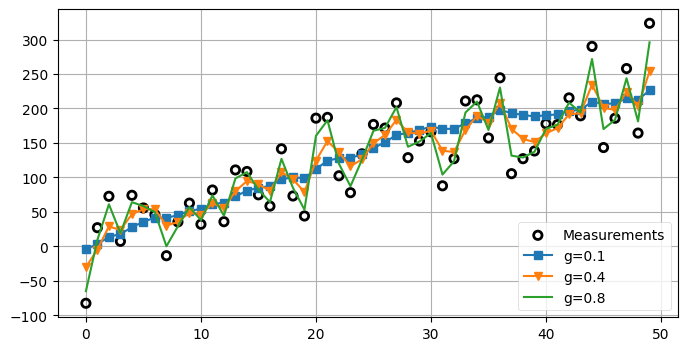

In [36]:
np.random.seed(100)
zs = gen_data(x0=5., dx=5., count=50, noise_factor=50)
data1 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.4, h=0.01)
data3 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.8, h=0.01)

with book_plots.figsize(y=4):
    book_plots.plot_measurements(zs, color='k')
    book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
    book_plots.plot_filter(data2, label='g=0.4', marker='v', c='C1')
    book_plots.plot_filter(data3, label='g=0.8', c='C2')
    plt.legend(loc=4)

很明显，当$g$变大时，我们更加密切地跟随测量而非预测。当$g=0.8$时，我们几乎完全跟随信号，几乎不拒绝任何噪声。人们可能天真地得出结论，认为$g$应该始终设置得非常小以最大程度地抑制噪声。然而，这意味着我们大多数情况下忽略了测量结果，而更倾向于我们的预测。当信号变化不是由于噪声，而是由于实际状态变化时会发生什么？我们来看看。我将创建数据，在改变为$\dot{x}=0$之前，$\dot{x}=1$连续持续9个步骤。

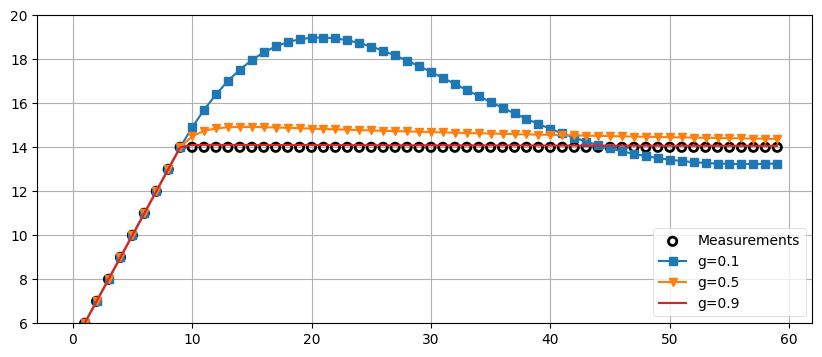

In [37]:
zs = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in range(50):
    zs.append(14)

data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.5, h=0.01)
data3 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.9, h=0.01)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
book_plots.plot_filter(data2, label='g=0.5', marker='v', c='C1')
book_plots.plot_filter(data3, label='g=0.9', c='C3')
plt.legend(loc=4)
plt.ylim([6, 20]);

在这里，我们可以看到忽略信号的影响。我们不仅滤除了噪声，也过滤掉了信号中合理的变化。

也许我们需要一个“恰到好处”的滤波器，其中$g$既不太大也不太小，而是刚刚好？嗯，并不完全是这样。正如之前提到的，不同的滤波器根据问题的数学特性以不同的方式选择$g$和$h$。例如，Benedict-Bordner滤波器是为了在这个例子中最小化瞬态误差而发明的，其中$\dot{x}$发生了跃变。我们在本书中不会讨论这个滤波器，但下面是两个使用不同允许的$g$和$h$配对选择的图表。这种滤波器设计在$\dot{x}$发生阶跃变化时最小化瞬态误差，但代价是对$\dot{x}$的其他类型变化不是最优的。

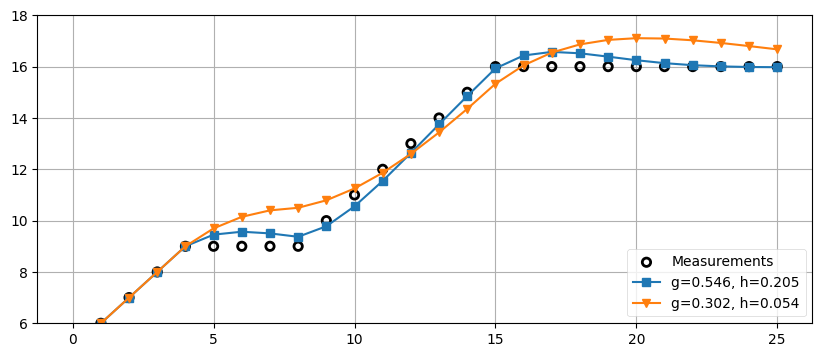

In [38]:
zs = [5,6,7,8,9,9,9,9,9,10,11,12,13,14,
      15,16,16,16,16,16,16,16,16,16,16,16]
data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.302, h=.054)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.546, h=.205)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data2, label='g=0.546, h=0.205', marker='s', c='C0')
book_plots.plot_filter(data1, label='g=0.302, h=0.054', marker='v', c='C1')
plt.legend(loc=4)
plt.ylim([6, 18]);

# 变化的$h$

现在让我们保持$g$不变，研究修改$h$的效果。我们知道$h$影响我们偏好于测量的$\dot{x}$还是我们的预测。但这意味着什么呢？如果我们的信号变化很大（相对于滤波器的时间步长），那么较大的$h$会使我们快速响应这些瞬态变化。较小的$h$会使我们反应更慢。

我们将看三个例子。我们有一个无噪声的测量，它在50个步骤中缓慢从0变为1。我们的第一个滤波器使用了几乎正确的$\dot{x}$初始值和一个较小的$h$。你可以从输出中看出，滤波器输出与信号非常接近。第二个滤波器使用了非常错误的$\dot{x}=2$的猜测。在这里，我们看到滤波器会“振荡”，直到它稳定下来并找到信号。第三个滤波器使用相同的条件，但现在将$h=0.5$。如果你观察振荡的振幅，你会发现它比第二个图表中的要小得多，但频率更高。它也比第二个滤波器更快地稳定下来，尽管差别不大。

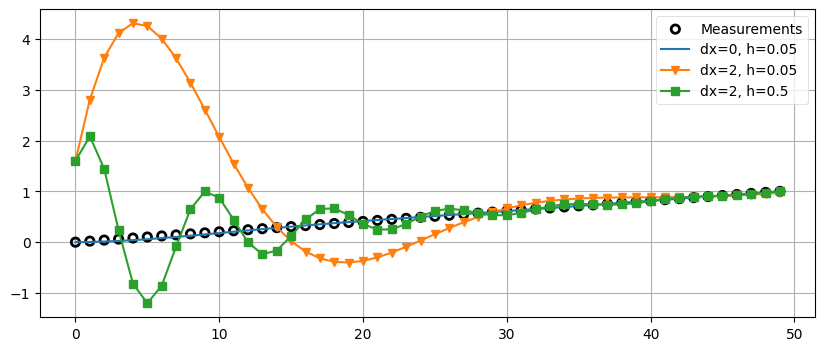

In [39]:
zs = np.linspace(0, 1, 50)

data1 = g_h_filter(data=zs, x0=0, dx=0., dt=1., g=.2, h=0.05)
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='dx=0, h=0.05', c='C0')
book_plots.plot_filter(data2, label='dx=2, h=0.05', marker='v', c='C1')
book_plots.plot_filter(data3, label='dx=2, h=0.5',  marker='s', c='C2')
plt.legend(loc=1);

# 交互示例

对于在Jupyter Notebook中运行的用户，我编写了一个交互式版本的滤波器，这样你就可以实时观察改变$\dot{x}$、$g$和$h$的效果。当你调整$\dot{x}$、$g$和$h$的滑块时，数据将重新进行滤波并为你绘制结果。

如果你真的想挑战自己，请阅读下一段并尝试在移动滑块之前预测结果。

一些尝试的方式包括将$g$和$h$设置为它们的最小值。看看滤波器是如何完美地跟踪数据的！这仅仅是因为我们完美地预测了体重增加。调整$\dot{x}$的值，大于或小于5。滤波器应该会与数据发散，永远无法重新获取它。逐渐添加$g$或$h$，看看滤波器是如何迅速回归数据的。观察只添加$g$和只添加$h$时线条的差异。你能解释其中的差异原因吗？然后尝试将$g$设置大于1。你能解释结果吗？将$g$设置回一个合理的值（比如0.1），然后将$h$设置得很大。你能解释这些结果吗？最后，将$g$和$h$都设置为它们的最大值。

如果你想要进一步探索，请将数组`zs`的值更改为上面任何一个图表中使用的值，然后重新运行单元格以查看结果。

In [41]:
from ipywidgets import interact

# my FloatSlider returns an ipywidgets.FloatSlider with
# continuous_update=False. Filtering code runs too slowly
# to instantly react to slider changes.
from kf_book.book_plots import FloatSlider

zs1 = gen_data(x0=5, dx=5., count=100, noise_factor=50)

fig = None
def interactive_gh(x, dx, g, h):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure()
    data = g_h_filter(data=zs1, x0=x, dx=dx, g=g, h=h)
    plt.scatter(range(len(zs1)), zs1, edgecolor='k', 
                facecolors='none', marker='o', lw=1)
    plt.plot(data, color='b')
    plt.show()

interact(interactive_gh,           
         x=FloatSlider(value=0, min=-200, max=200), 
         dx=FloatSlider(value=5, min=-50, max=50), 
         g=FloatSlider(value=.1, min=.01, max=2, step=.02), 
         h=FloatSlider(value=.02, min=.0, max=.5, step=.01));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=200.0, min=-200.0),…

# 不要向滤波器隐瞒信息

你可以任意设置$g$和$h$的值。这是一个即使有极端噪声也能完美运行的滤波器。


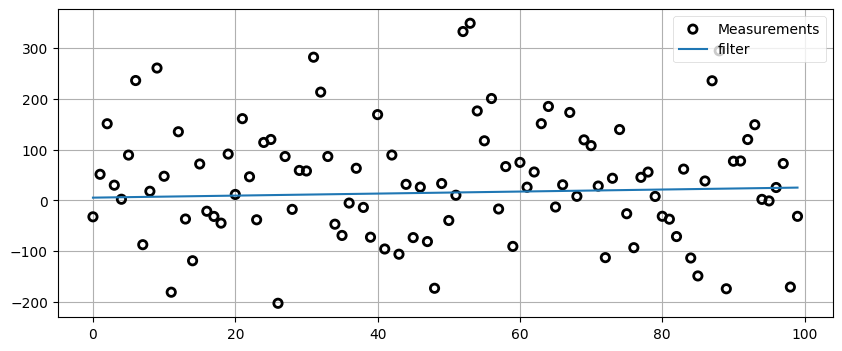

In [42]:
zs = gen_data(x0=5., dx=.2, count=100, noise_factor=100)
data = g_h_filter(data=zs, x0=5., dx=.2, dt=1., g=0., h=0.)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label='filter')
plt.legend(loc=1);

我惊人地从极其嘈杂的数据中提取出了一条直线！也许我还不应该急着去领取我的数学菲尔兹奖。我之所以能做到这一点，是将$g$和$h$都设置为0。这会导致什么结果？这让滤波器忽略了测量值，因此每次更新时，它会将新位置计算为$x + \Delta x \Delta t$。当然，如果我们忽略了测量，结果就是一条直线。

一个忽略测量的滤波器是毫无用处的。我知道你绝对不会将$g$和$h$都设置为零，因为那需要一种特殊的天赋，而这种天赋只有我拥有。但我向你保证，如果你不小心，可能会将它们设置得比它们应该的值更低。你总是可以通过测试数据获得非常出色的结果。但是当你尝试将你的滤波器应用于不同的数据时，你可能会对结果感到失望，因为你会因为针对特定数据集精调了参数，一旦切换到真实数据，可能会得到类似这样的结果：

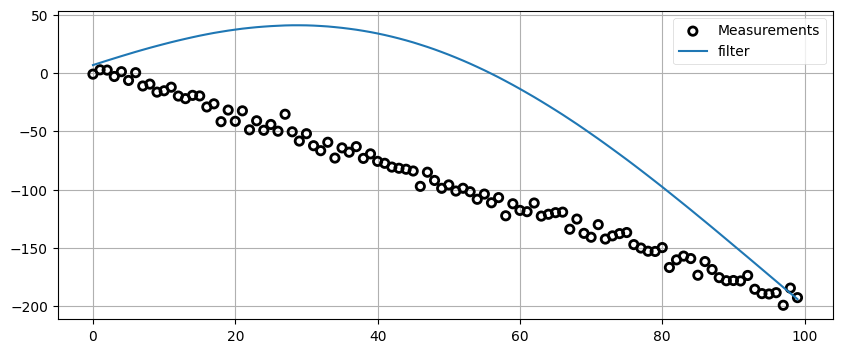

In [43]:
zs = gen_data(x0=5, dx=-2, count=100, noise_factor=5)
data = g_h_filter(data=zs, x0=5., dx=2., dt=1., g=.005, h=0.001)
book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label='filter')
plt.legend(loc=1);

# 追踪火车

我们准备进行一个实际的例子。在本章的早些时候，我们谈到了追踪火车的问题。火车又重又慢，因此它们不能快速改变速度。它们在轨道上行驶，因此除非减速停止然后改变方向，否则它们不能改变方向。因此，我们可以得出结论，如果我们已经大致知道火车的位置和速度，那么我们就能在不久的将来以非常高的精度预测其位置。火车在一两秒内不能改变速度太多。

我们来为火车编写一个滤波器。火车的位置表示为相对于某个固定点（我们称之为0公里）在轨道上的位置。也就是说，位置为1表示火车距离固定点1公里远。速度以米/秒表示。我们每秒对位置进行一次测量，误差范围为$\pm$ 500米。我们应该如何实现我们的滤波器呢？

首先，让我们在没有滤波器的情况下模拟这种情况。我们假设火车当前位于第23公里，并且以15米/秒的速度移动。我们可以将其编码为：

```python
pos = 23*1000
vel = 15
```

现在我们可以计算火车在未来某个时间的位置，*假设*速度不发生变化，使用以下公式：

```python
def compute_new_position(pos, vel, dt=1):
    return pos + (vel * dt)
```

我们可以通过在位置上添加一些随机噪声来模拟测量。在这里，我们的误差是500米，所以代码可能如下所示：

```python
def measure_position(pos):
        return pos + random.randn()*500
```

让我们将这些放入一个单元格，并绘制100秒模拟的结果。我将使用NumPy的`asarray`函数将数据转换为NumPy数组。这将使我能够使用'/'运算符一次性地将数组的所有元素除以一个数。

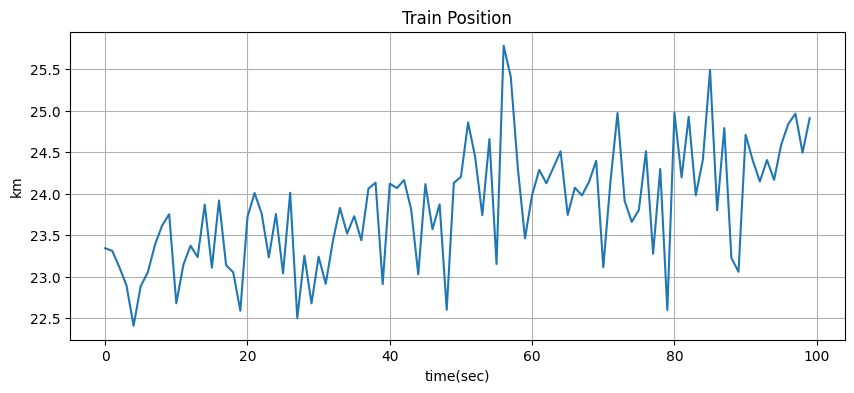

In [44]:
from numpy.random import randn

def compute_new_position(pos, vel, dt=1.):
    """ dt is the time delta in seconds."""
    return pos + (vel * dt)

def measure_position(pos):
    return pos + randn()*500

def gen_train_data(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        zs.append(measure_position(pos))
    return np.asarray(zs)
  
pos, vel = 23.*1000, 15.
zs = gen_train_data(pos, vel, 100)

plt.plot(zs / 1000.)  # convert to km
book_plots.set_labels('Train Position', 'time(sec)', 'km')

从图表中可以看出测量结果是多么糟糕。现实中的火车永远不可能移动成这样。

那么，如果我们想要对这些数据进行滤波，应该设置$g$和$h$为多少呢？我们还没有为此制定理论，但让我们试着凭直觉得出一个合理的答案。我们知道测量结果非常不准确，所以我们不想给予它们太大的权重。为了做到这一点，我们需要选择一个非常小的$g$。同时，我们也知道火车不能快速加速或减速，所以我们也希望$h$很小。例如：

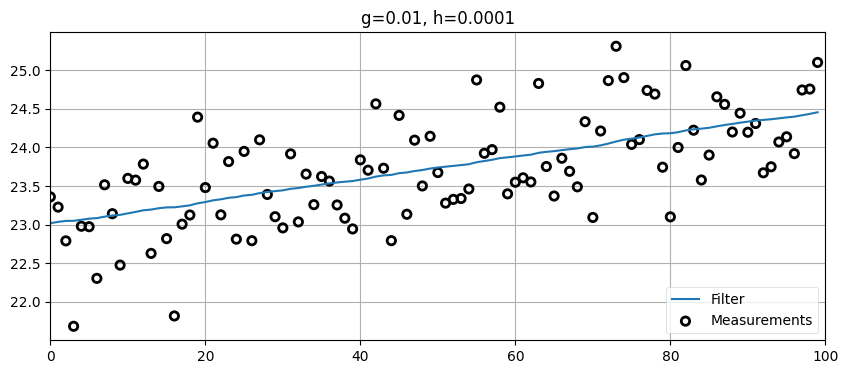

In [45]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.0001')

这个初始猜测还不错。让我们增大$g$，看看效果如何。

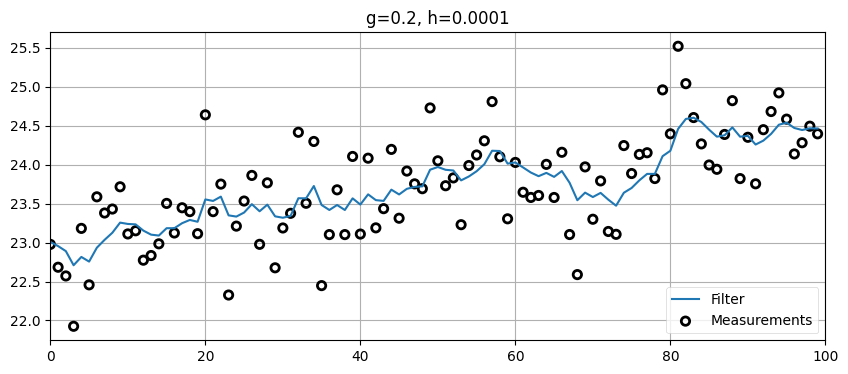

In [46]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.2, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.2, h=0.0001')

我们将`g=0.2`，可以看到火车的位置不平滑了，但估计的位置（因此也是速度）在一个非常短的时间段内波动很大，远远超过了真实火车的行为范围。因此，根据经验我们知道我们需要`g<<0.2`。

现在让我们看看选择不当的$h$会有什么影响。

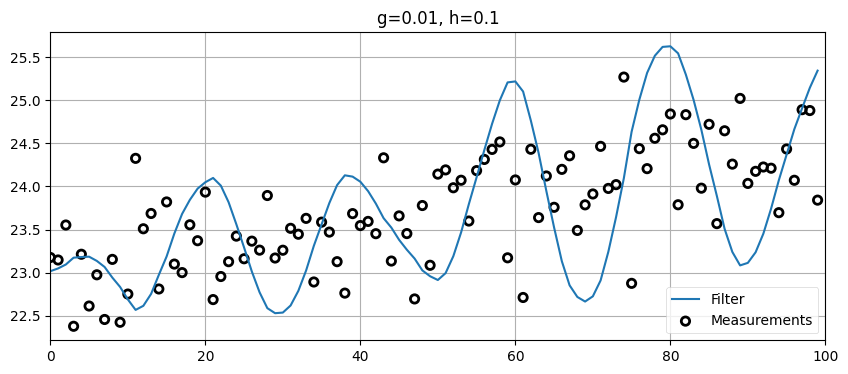

In [47]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=0.01, h=0.1)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.1')

这里由于较小的$g$，位置变化平滑，但是较大的$h$使得滤波器对测量非常敏感。这是因为在几秒钟内快速变化的测量暗示着非常大的速度变化，而较大的$h$告诉滤波器快速地对这些变化作出反应。火车无法快速改变速度，因此滤波器不能很好地过滤数据——滤波器的速度变化比火车快。

最后，让我们给火车增加一些加速度。我不知道火车实际上能加速多快，但我们假设它加速度为0.2米/秒²。

In [48]:
def gen_train_data_with_acc(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        vel += 0.2
        zs.append(measure_position(pos))
    return np.asarray(zs) 


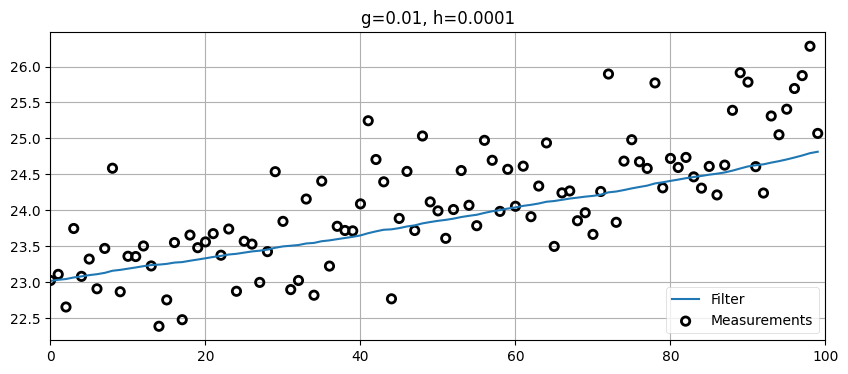

In [49]:
zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.0001')

这里我们可以看到，由于加速度的影响，滤波器并没有完全跟踪火车的位置。我们可以调整$h$来更好地跟踪，但这会牺牲平滑的滤波估计。

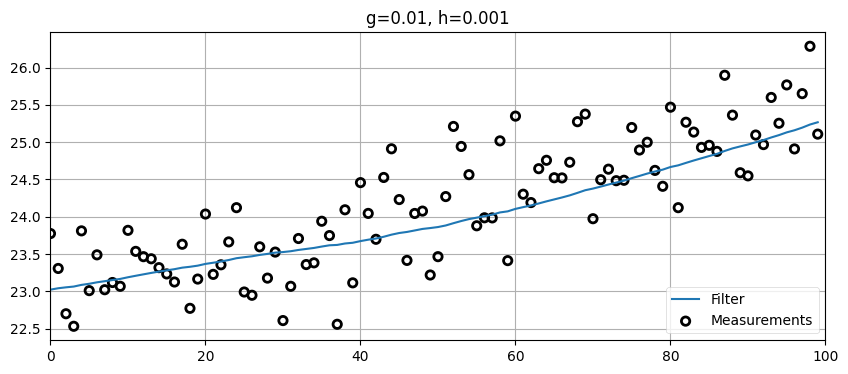

In [54]:
zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.001')

这里有两个要学习的经验教训。首先，利用$h$项来应对你没有建模的速度变化。但更重要的是，这里存在一个权衡，即快速、准确地响应行为变化和在系统稳定状态下产生理想输出之间的权衡。如果火车从不改变速度，我们可以将$h$设得非常小，以避免滤波估计受到测量噪声的过度影响。但在一个有趣的问题中，状态几乎总是会变化，我们希望能够迅速做出反应。我们反应得越快，就越容易受到传感器噪声的影响。

我还可以继续讲下去，但我这里的目标并不是详细展开g-h滤波器理论，而是增进对如何结合测量和预测来得到滤波解的洞察力。在选择类似这种问题的$g$和$h$方面有大量文献可供参考，并且有最优的选择方法来实现各种目标。正如我之前所解释的，在测试数据中进行实验时很容易“欺骗”滤波器。在接下来的章节中，我们将学习卡尔曼滤波器如何以同样基本的方式解决这个问题，但使用了更加复杂的数学方法。

# FilterPy 中的 g-h Filters

《FilterPy》是我编写的一个开源滤波库。它包含了本书中的所有滤波器以及其他滤波器。虽然编写自己的g-h滤波器相对比较容易，但随着我们的学习进展，我们会更多地依赖于《FilterPy》。作为一个快速介绍，让我们看一下《FilterPy》中的g-h滤波器。

如果你还没有安装FilterPy，只需在命令行中输入以下命令：

    pip install filterpy

要使用g-h滤波器，导入它并从`GHFilter`类创建一个对象。

In [55]:
from filterpy.gh import GHFilter
f = GHFilter(x=0., dx=0., dt=1., g=.8, h=.2)

在构建对象时，您需要指定信号的初始值和变化速率（`x`和`dx`）、更新之间的时间步长（`dt`）以及两个滤波器参数（`g`和`h`）。`dx`必须与`x`/`dt`具有相同的单位——如果`x`单位是米，`dt`单位是秒，则`dx`必须是米每秒。

要运行滤波器，调用`update`方法，并将测量值传递给参数`z`，这在文献中是测量值的标准名称。

In [56]:
f.update(z=1.2)

(0.96, 0.24)

`update()` 方法返回一个元组，包含了`x`和`dx`的新值，但您也可以从对象中访问它们。

In [57]:
print(f.x, f.dx)

0.96 0.24


您可以动态地修改`g`和`h`的值。

In [59]:
print(f.update(z=2.1, g=.85, h=.15))

(1.965, 0.375)


您可以对一系列的测量值进行批处理滤波。

In [60]:
print(f.batch_filter([3., 4., 5.]))

[[1.965 0.375]
 [2.868 0.507]
 [3.875 0.632]
 [4.901 0.731]]


你可以对多个独立变量进行滤波。如果你要跟踪一架飞机，你需要在三维空间中进行跟踪。使用 NumPy 数组来处理 `x`、`dx` 和测量值。

In [61]:
x_0  = np.array([1., 10., 100.])
dx_0 = np.array([10., 12., .2])
               
f_air = GHFilter(x=x_0, dx=dx_0, dt=1., g=.8, h=.2)
f_air.update(z=np.array((2., 11., 102.)))
print(' x =', f_air.x)
print('dx =', f_air.dx)

 x = [  3.8   13.2  101.64]
dx = [8.2  9.8  0.56]


`GHFilterOrder`类允许您创建0、1或2阶的滤波器。g-h滤波器是1阶的。而g-h-k滤波器，我们还没有讨论过，可以跟踪加速度。这两个类都具有实际应用所需的功能，例如计算方差缩减因子（VRF），这在本章中我们还没有讨论。我可以写一本书来讨论g-h滤波器的理论和应用，但我们在本书中有其他的目标。如果您感兴趣，可以探索FilterPy的代码，并进行进一步阅读。

# 总结

我鼓励你尝试使用这个滤波器来加深对其反应方式的理解。你不需要多次尝试就会意识到，随意选择的$g$和$h$并不会表现得很好。某个特定的选择在某种情况下可能表现良好，但在另一种情况下可能表现非常糟糕。即使你理解了$g$和$h$的影响，选择合适的值也可能很困难。事实上，你极少有可能为任何特定问题选择到最优的$g$和$h$的值。滤波器是*设计出来的*，而不是*随意选择的*。

在某种程度上，我不想在这里结束本章，因为我们可以谈论很多关于选择$g$和$h$的内容。但是，以这种形式呈现的g-h滤波器并非本书的目的。设计卡尔曼滤波器需要你指定许多参数——间接地，它们确实与选择$g$和$h$有关，但在设计卡尔曼滤波器时你永远不会直接涉及到它们。此外，$g$和$h$会以一种非常不明显的方式在每个时间步发生变化。

这些滤波器还有另一个我们几乎没有涉及到的特性——贝叶斯统计。你会注意到，“贝叶斯”一词出现在本书的标题中；这不是巧合！暂时我们将把$g$和$h$留在一边，很大程度上没有深入探索，而会发展一种非常强大的概率推理形式来进行滤波。但突然间，同样的g-h滤波器算法将以一个形式化的数学结构出现，让我们能够从多个传感器创建滤波器，准确估计解决方案中的误差，并控制机器人。